run this in conda prompt
- conda activate <env_name>
- conda install -c conda-forge python-graphviz -y
- pip install pydot

In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import plot_model 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
x_train = x_train / 255.0 
x_test = x_test / 255.0 
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [3]:
for layer in vgg_base.layers: 
    layer.trainable = False

In [4]:
model = Sequential() 
model.add(vgg_base) 
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

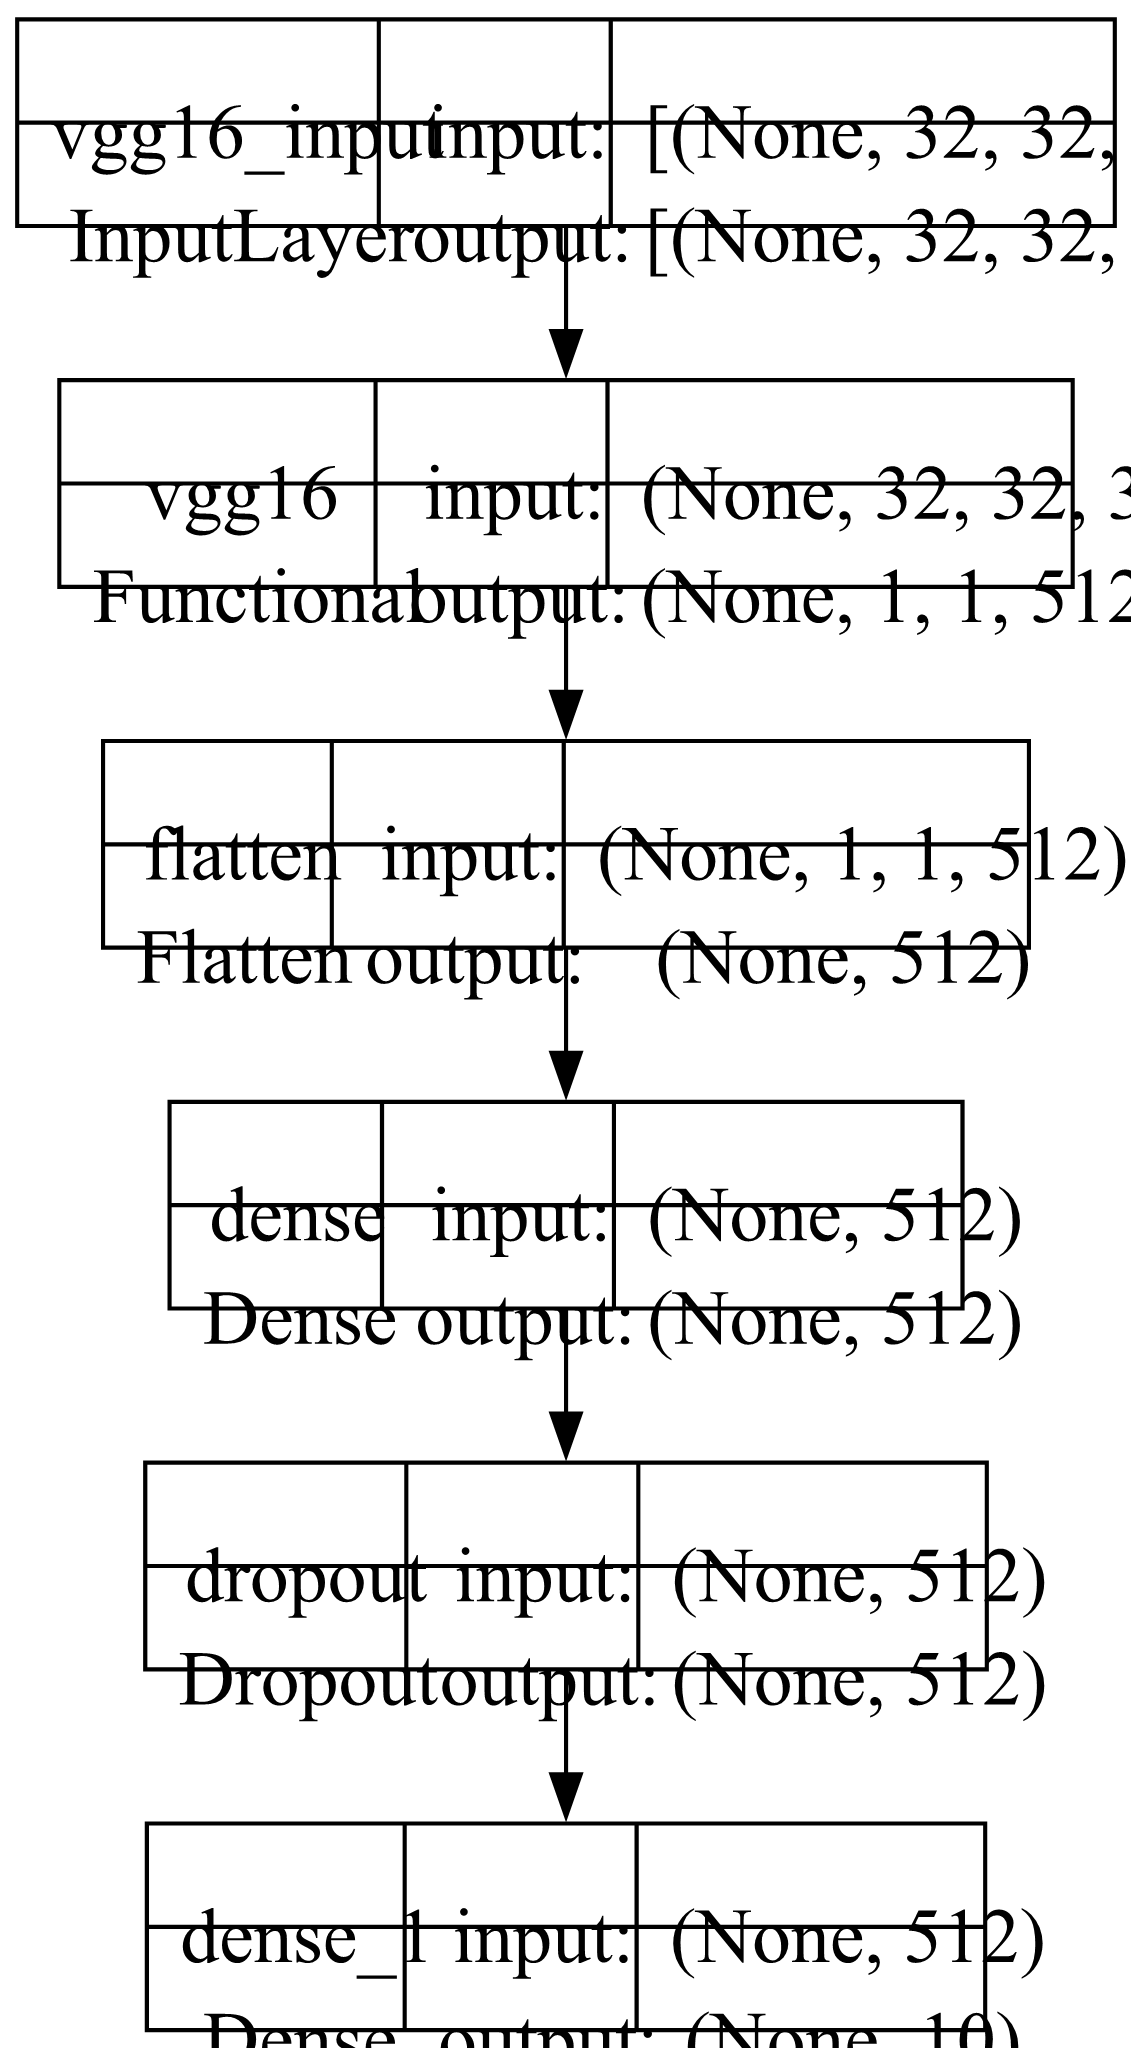

In [6]:
plot_model(model, to_file='cnn.png', show_shapes=True, 
           show_layer_names=True, dpi=300) 

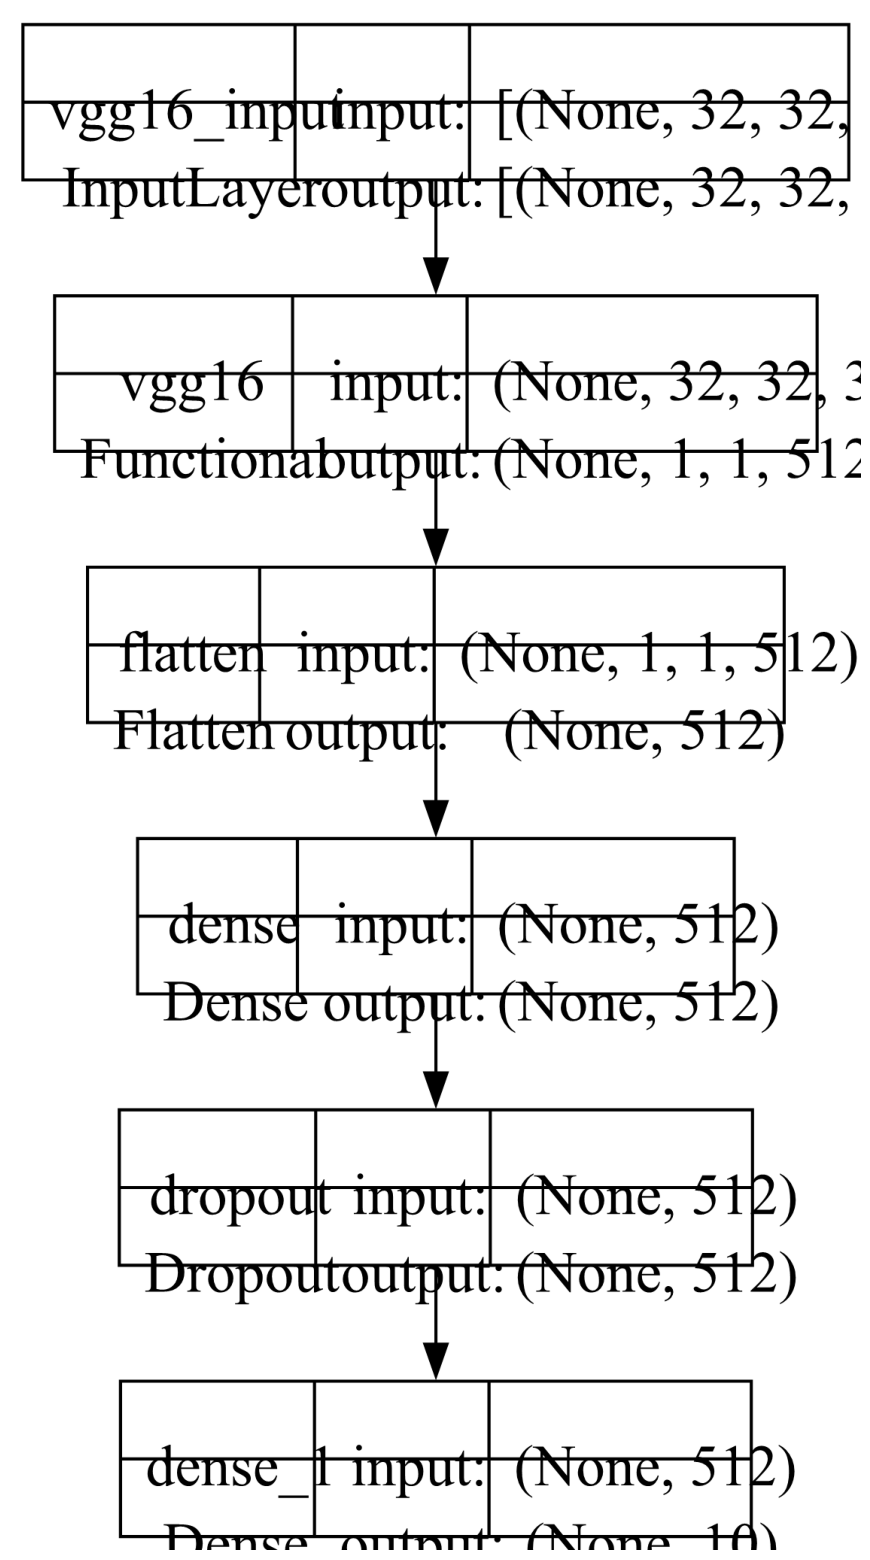

In [7]:
plt.figure(figsize=(20, 20)) 
img = plt.imread('cnn.png') 
plt.imshow(img) 
plt.axis('off') 
plt.show()

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 270s 216ms/step - loss: 1.4461 - accuracy: 0.4968 - val_loss: 1.3405 - val_accuracy: 0.5371
Epoch 2/10
1250/1250 [==============================] - 287s 230ms/step - loss: 1.3607 - accuracy: 0.5302 - val_loss: 1.2896 - val_accuracy: 0.5541
Epoch 3/10
1250/1250 [==============================] - 337s 270ms/step - loss: 1.3128 - accuracy: 0.5428 - val_loss: 1.2569 - val_accuracy: 0.5630
Epoch 4/10
1250/1250 [==============================] - 263s 210ms/step - loss: 1.2726 - accuracy: 0.5609 - val_loss: 1.2362 - val_accuracy: 0.5692
Epoch 5/10
1250/1250 [==============================] - 253s 203ms/step - loss: 1.2409 - accuracy: 0.5684 - val_loss: 1.2107 - val_accuracy: 0.5792
Epoch 6/10
1250/1250 [==============================] - 289s 231ms/step - loss: 1.2208 - accuracy: 0.5759 - val_loss: 1.2010 - val_accuracy: 0.5839
Epoch 7/10
1250/1250 [==============================] - 257s 206ms/step - loss: 1.2003 - accuracy: 0.5852 - val_

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test) 
print(f'Test Loss: {test_loss:.4f}') 
print(f'Test Accuracy: {test_acc * 100:.2f}%')

In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

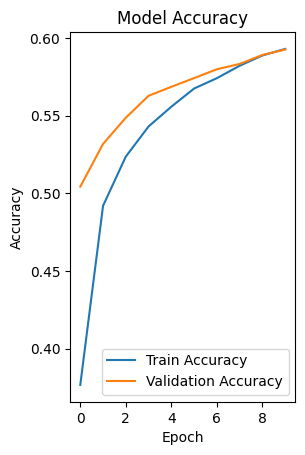

In [11]:
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Model Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend()

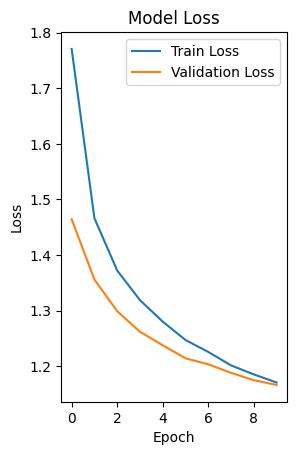

In [12]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Model Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 

In [13]:
plt.tight_layout() 
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
'dog', 'frog', 'horse', 'ship', 'truck'] 

In [15]:
sample = x_test[0].reshape(1, 32, 32, 3) 
prediction = model.predict(sample) 
predicted_class = class_names[np.argmax(prediction)]

1/1 [==============================] - 0s 257ms/step


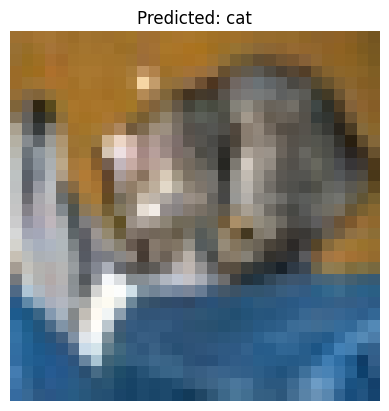

In [16]:
plt.imshow(x_test[0]) 
plt.title(f"Predicted: {predicted_class}") 
plt.axis('off') 
plt.show()